# Imports

In [2]:
# Python imports
import matplotlib.pyplot as plt
import numpy as np

# Keras model layers
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

# Dataset shaping

In [7]:
# Download and load the dataset
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Shapes and bounds
print('Train set:')
print('Sizes:', X_train_raw.shape, y_train_raw.shape)

print('Test set:')
print('Sizes:', X_test_raw.shape, y_test_raw.shape)

print('Image values (min to max):', np.min(X_train_raw), 'to', np.max(X_train_raw))
print('Label values (min to max):', np.min(y_train_raw), 'to', np.max(y_train_raw))

Train set:
Sizes: (60000, 28, 28) (60000,)
Test set:
Sizes: (10000, 28, 28) (10000,)
Image values (min to max): 0 to 255
Label values (min to max): 0 to 9


# Normalising the dataset

In [ ]:
# normalise raw image data by dividing by the maximum value
X_train = X_train_raw / 255 # normalise X_train
X_test = X_test_raw / 255 # normalise X_test

# flatten normalised data into 1D vectors
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

# convert raw labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10, dtype='float64')
# convert y_train

y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10, dtype='float64')
# convert y_test

# shuffle training samples (same permutation for X and Y so that labels still correspond)
np.random.seed(0) # fix random seed so that everyone has the same dataset permutation
permutation = np.random.permutation(X_train.shape[0])
X_train = X_train[permutation]
y_train = y_train[permutation]

# Print shapes and bounds
print('### Train set:')
print('Sizes:', X_train.shape, y_train.shape)
print('Image values (min to max):', np.min(X_train), 'to', np.max(X_train))
print('Label values (min to max):', np.min(y_train), 'to', np.max(y_train))
print('Total samples per class:', np.sum(y_train, axis=0))

print('### Test set:')
print('Sizes:', X_test.shape, y_test.shape)
print('Image values (min to max):', np.min(X_test), 'to', np.max(X_test))
print('Label values (min to max):', np.min(y_test), 'to', np.max(y_test))
print('Total samples per class:', np.sum(y_test, axis=0))

### Train set:
Sizes: (60000, 784) (60000, 10)
Image values (min to max): 0.0 to 1.0
Label values (min to max): 0.0 to 1.0
Total samples per class: [6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]
### Test set:
Sizes: (10000, 784) (10000, 10)
Image values (min to max): 0.0 to 1.0
Label values (min to max): 0.0 to 1.0
Total samples per class: [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


# Sample of what the data looks like

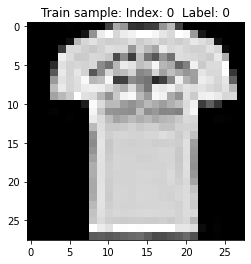

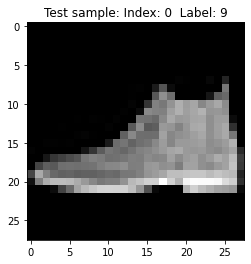

In [ ]:
# Display a sample
def display_digit(index, xs, ys, title):
    label = np.argmax(ys[index]) # argmax used to convert from one-hot back to numeric label
    image = xs[index].reshape([28,28]) # make sure that the data is in 2D shape
    plt.title(title+': Index: %d  Label: %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

display_digit(index=0, xs=X_train, ys=y_train, title='Train sample') # display the first training example
display_digit(index=0, xs=X_test,  ys=y_test,  title='Test sample')  # display the first test example

# Defining the model constructs

In [ ]:
# get input and output sizes
input_dim = X_train.shape[1] # 784
output_dim = y_train.shape[1] # 10

# Create Sequential model - this allows you to add layers one after the other to build your model
model = Sequential()
model.add(Dense(input_dim, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

# Compile model
optim = SGD(lr=0.01)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [ ]:
# settings
batch_size = 32
nb_epoch = 20

# train the model and save training history
history = model.fit(X_train, y_train,
          batch_size=batch_size, 
          epochs=nb_epoch, 
          verbose=1, 
          validation_split=(0.06) # set 10K samples (out of 60K) aside for validation
)

# save model weights to file
model.save_weights('fashion_mnist_logistic_regression.h5')

Epoch 1/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.9587 - accuracy: 0.6652 - val_loss: 0.5857 - val_accuracy: 0.8019
Epoch 2/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.6353 - accuracy: 0.7793 - val_loss: 0.5039 - val_accuracy: 0.8250
Epoch 3/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.5596 - accuracy: 0.8054 - val_loss: 0.4671 - val_accuracy: 0.8300
Epoch 4/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.5185 - accuracy: 0.8190 - val_loss: 0.4406 - val_accuracy: 0.8419
Epoch 5/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.4922 - accuracy: 0.8279 - val_loss: 0.4269 - val_accuracy: 0.8472
Epoch 6/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.4701 - accuracy: 0.8361 - val_loss: 0.4230 - val_accuracy: 0.8475
Epoch 7/20
1763/1763 [==============================] - 4s 2ms/step - loss: 0.4534 - accuracy: 0.8420 - val_loss: 0.4083 - val_accuracy:

# Model Evaluation

In [ ]:
# load model weights from file
model.load_weights('fashion_mnist_logistic_regression.h5')

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8749
Test loss: 0.3521159589290619
Test accuracy: 0.8748999834060669


# Training Behaviour

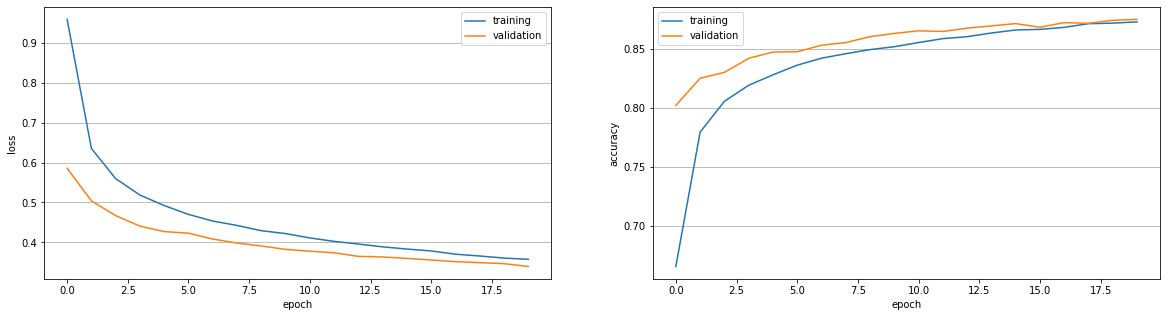

In [ ]:
# summarize history for loss and accuracy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='upper right')
ax1.yaxis.grid()

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper left')
ax2.yaxis.grid()

plt.show()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             multiple                  615440    
_________________________________________________________________
dropout_20 (Dropout)         multiple                  0         
_________________________________________________________________
dense_30 (Dense)             multiple                  78500     
_________________________________________________________________
dropout_21 (Dropout)         multiple                  0         
_________________________________________________________________
dense_31 (Dense)             multiple                  1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


In [13]:
import pickle
import numpy as np

# save to file for later use
myData = {
    'fashion_mnist dataset': fashion_mnist
}

#print(myData)

with open('fashion_mnist dataset.pkl', 'wb') as f:
    pickle.dump(myData, f)